<a href="https://colab.research.google.com/github/Annoor-94/DS-ML/blob/main/Predict_Loan_Eligibility_using_Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Copy of loan - loan.csv")
df.head()

In [ ]:
df["Loan_Status"] = df["Loan_Status"].replace({"Y":1, "N":0})
df.head()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

<Axes: >

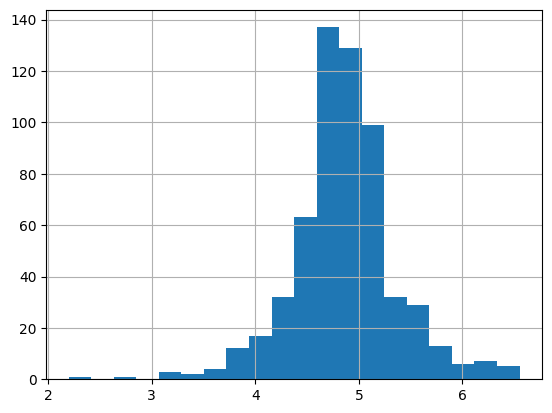

In [ ]:
df['LoanAmount'] = np.log(df['LoanAmount'])
df['LoanAmount'].hist(bins=20)

<Axes: >

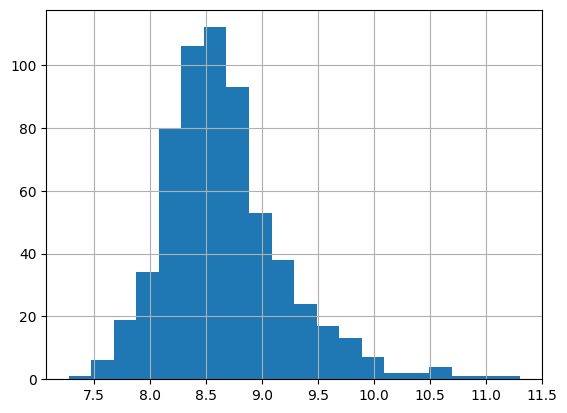

In [ ]:
df['TotalIncome'] = df['ApplicantIncome']+ df['CoapplicantIncome']
df['TotalIncome'] = np.log(df['TotalIncome'])
df['TotalIncome'].hist(bins=20)

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace= True)
df['Married'].fillna(df['Married'].mode()[0], inplace= True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace= True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace= True)
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace= True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace= True)

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

In [ ]:
x= df.iloc[:,np.r_[1:11]].values
y= df.iloc[:,12].values

x


array([['Male', 'No', '0', ..., 4.857444178729352, 360.0, 1.0],
       ['Male', 'Yes', '1', ..., 4.852030263919617, 360.0, 1.0],
       ['Male', 'Yes', '0', ..., 4.189654742026425, 360.0, 1.0],
       ...,
       ['Male', 'Yes', '1', ..., 5.53338948872752, 360.0, 1.0],
       ['Male', 'Yes', '2', ..., 5.231108616854587, 360.0, 1.0],
       ['Female', 'No', '0', ..., 4.890349128221754, 360.0, 0.0]],
      dtype=object)

In [ ]:
y


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
print("Per of missing gender is %2f%%" %((df['Gender'].isnull().sum()/df.shape[0])*100))

Per of missing gender is 0.000000%


<ipython-input-12-d322d9d014ad>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  gender= [gender for gender, df in df.groupby(['Gender'])]
<ipython-input-12-d322d9d014ad>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(gender,df.groupby(['Gender']).sum()['Count'])


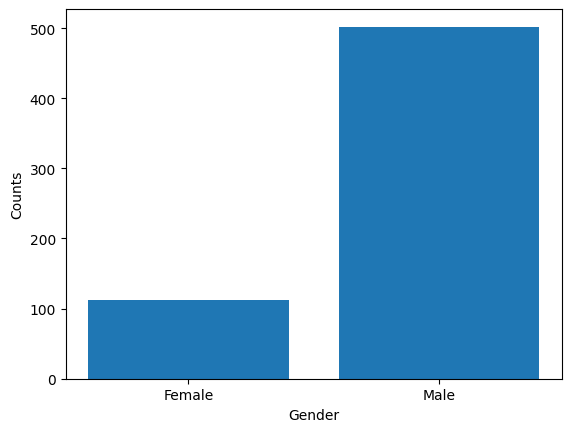

In [ ]:
df['Count'] = 1

gender= [gender for gender, df in df.groupby(['Gender'])]
plt.bar(gender,df.groupby(['Gender']).sum()['Count'])
plt.ylabel('Counts')
plt.xlabel('Gender')

plt.show()

<ipython-input-13-d643c94639f9>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  married= [married for married, df in df.groupby(['Married'])]
<ipython-input-13-d643c94639f9>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(married,df.groupby(['Married']).sum()['Count'])


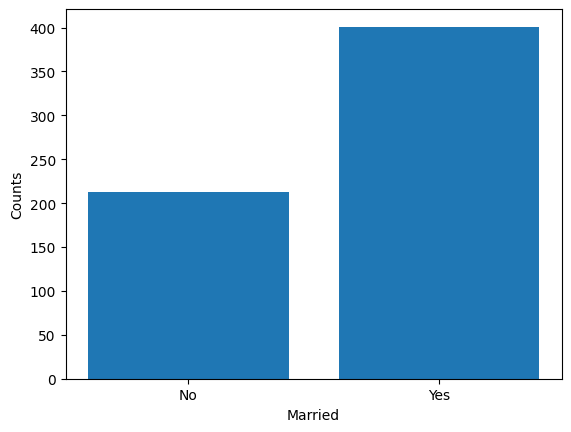

In [ ]:
df['Count'] = 1

married= [married for married, df in df.groupby(['Married'])]
plt.bar(married,df.groupby(['Married']).sum()['Count'])
plt.ylabel('Counts')
plt.xlabel('Married')
plt.show()

Number of people who take loan by dependents


<ipython-input-14-18e691343030>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  dependents= [dependents for dependents, df in df.groupby(['Dependents'])]
<ipython-input-14-18e691343030>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(dependents,df.groupby(['Dependents']).sum()['Count'])


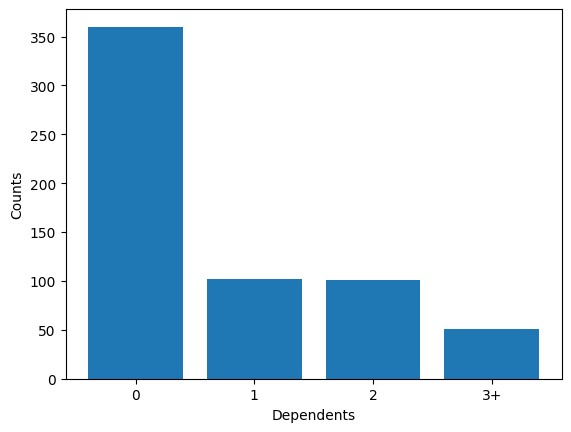

In [ ]:
print("Number of people who take loan by dependents")
df['Count'] = 1

dependents= [dependents for dependents, df in df.groupby(['Dependents'])]
plt.bar(dependents,df.groupby(['Dependents']).sum()['Count'])
plt.ylabel('Counts')
plt.xlabel('Dependents')

plt.show()

Number of people who take loan by self_employed


<ipython-input-15-5cbb6f508688>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  self_employed= [self_employed for self_employed, df in df.groupby(['Self_Employed'])]
<ipython-input-15-5cbb6f508688>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(self_employed,df.groupby(['Self_Employed']).sum()['Count'])


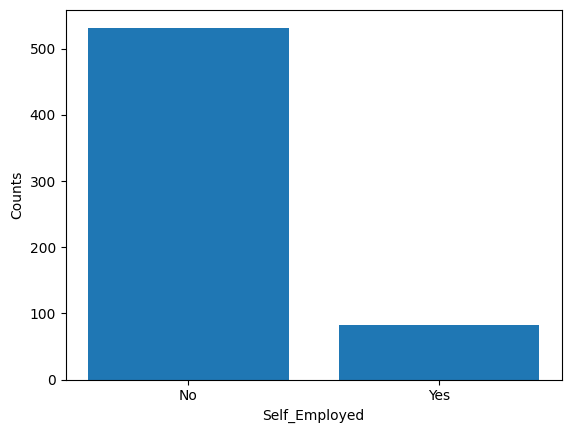

In [ ]:
print("Number of people who take loan by self_employed")
df['Count'] = 1

self_employed= [self_employed for self_employed, df in df.groupby(['Self_Employed'])]
plt.bar(self_employed,df.groupby(['Self_Employed']).sum()['Count'])
plt.ylabel('Counts')
plt.xlabel('Self_Employed')

plt.show()

Number of people who take loan by loan amount


<ipython-input-16-38fc03156dc4>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  loan_amount= [loan_amount for loan_amount, df in df.groupby(['LoanAmount'])]
<ipython-input-16-38fc03156dc4>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(loan_amount,df.groupby(['LoanAmount']).sum()['Count'])


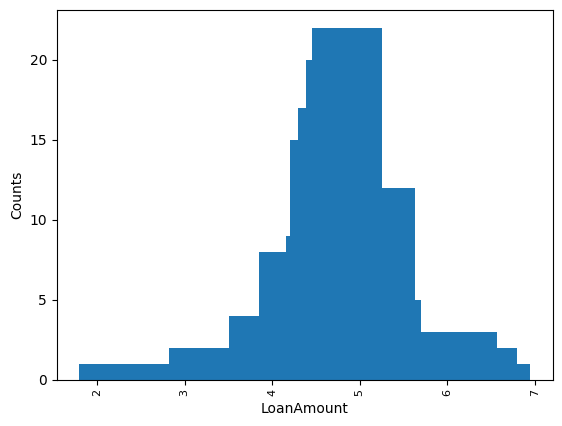

In [ ]:
print("Number of people who take loan by loan amount")
df['Count'] = 1

loan_amount= [loan_amount for loan_amount, df in df.groupby(['LoanAmount'])]
plt.bar(loan_amount,df.groupby(['LoanAmount']).sum()['Count'])
plt.ylabel('Counts')
plt.xlabel('LoanAmount')

plt.xticks(rotation='vertical', size=8)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)
from sklearn.preprocessing import LabelEncoder
LabelEncoder_x = LabelEncoder()

In [ ]:
for i in range(0,5):
  X_train[:,i]= LabelEncoder_x.fit_transform(X_train[:,i])
  X_train[:,7]= LabelEncoder_x.fit_transform(X_train[:,7])

X_train


array([[1, 1, 0, ..., 81, 360.0, 1.0],
       [1, 0, 1, ..., 131, 360.0, 1.0],
       [1, 1, 0, ..., 98, 360.0, 0.0],
       ...,
       [1, 1, 3, ..., 132, 360.0, 1.0],
       [1, 1, 0, ..., 108, 360.0, 1.0],
       [0, 1, 0, ..., 122, 360.0, 1.0]], dtype=object)

In [ ]:
LabelEncoder_y = LabelEncoder()
y_train= LabelEncoder_y.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
for i in range(0,5):
  X_test[:,i]= LabelEncoder_x.fit_transform(X_test[:,i])
  X_test[:,7]= LabelEncoder_x.fit_transform(X_test[:,7])

X_test

array([[1, 0, 0, ..., 10, 360.0, 1.0],
       [0, 0, 0, ..., 24, 360.0, 1.0],
       [1, 1, 0, ..., 71, 360.0, 1.0],
       ...,
       [1, 1, 0, ..., 73, 360.0, 1.0],
       [1, 1, 3, ..., 4, 180.0, 0.0],
       [1, 1, 1, ..., 15, 360.0, 1.0]], dtype=object)

In [ ]:
LabelEncoder_y = LabelEncoder()
y_test= LabelEncoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train= ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf= RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn import metrics
y_pred = rf_clf.predict(X_test)

print("Accuracy of Random Forest Classifier is:", metrics.accuracy_score(y_pred, y_test))
y_pred

Accuracy of Random Forest Classifier is: 0.6585365853658537


array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_pred = nb_clf.predict(X_test)

print("Accuracy of Naive Byes Classifier is:", metrics.accuracy_score(y_pred, y_test))
y_pred

Accuracy of Naive Byes Classifier is: 0.8455284552845529


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
y_pred = dt_clf.predict(X_test)

print("Accuracy of Decision Tree Classifier is:", metrics.accuracy_score(y_pred, y_test))
y_pred

Accuracy of Decision Tree Classifier is: 0.6097560975609756


array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = kn_clf.predict(X_test)

print("Accuracy of KNeighbors Classifier is:", metrics.accuracy_score(y_pred, y_test))
y_pred

Accuracy of KNeighbors Classifier is: 0.7723577235772358


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])